In [1]:
import csv
import cv2
import numpy as np
from tqdm import tqdm

def readData(filepath):
    csvFile=open(filepath+"/driving_log.csv")
    images=[]
    angles=[]
    reader=csv.reader(csvFile)
    
    lines=[]
    for line in reader:
        lines.append(line)
    
    for line in tqdm(lines):
        # center 0,3
        imageName=line[0].split("/")[-1]
        angle=float(line[3])

        #left
        #right
        image=cv2.imread(filepath+"/IMG/"+imageName)
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        images.append(image)
        angles.append(angle)
    return np.array(images),np.array(angles)

x,y=readData("data")
print("Total Data available: ",len(x))

100%|██████████| 8036/8036 [00:14<00:00, 557.95it/s]


Total Data available:  8036


In [2]:
X_train=x
Y_train=y
print("Input Shape : ",x.shape)
print("Output Shape : ",y.shape)

Input Shape :  (8036, 160, 320, 3)
Output Shape :  (8036,)


(array([  2.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   8.00000000e+00,
          6.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.70000000e+01,   1.20000000e+01,
          1.00000000e+00,   4.00000000e+00,   1.50000000e+01,
          3.00000000e+00,   1.00000000e+01,   8.00000000e+00,
          1.00000000e+01,   9.00000000e+00,   4.00000000e+00,
          5.00000000e+00,   9.00000000e+00,   1.40000000e+01,
          9.00000000e+00,   4.30000000e+01,   3.80000000e+01,
          3.10000000e+01,   1.80000000e+01,   1.00000000e+01,
          1.10000000e+01,   9.00000000e+00,   3.60000000e+01,
          4.10000000e+01,   5.60000000e+01,   7.00000000e+00,
          8.00000000e+00,   1.60000000e+01,   2.00000000e+01,
          3.60000000e+01,   4.90000000e+01,   1.79000000e+02,
        

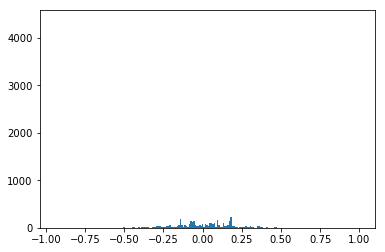

In [3]:
#Input data distribution
import matplotlib.pyplot as plt
%matplotlib inline
op_class=np.unique(Y_train)
plt.hist(Y_train,op_class)

In [4]:
from collections import Counter
Output_Dense=Counter(Y_train)
class_size=dict(Output_Dense).fromkeys(Output_Dense,0)
print(Output_Dense)

Counter({0.0: 4361, 0.1765823: 237, -0.14520640000000001: 179, 0.090465500000000004: 165, -0.059757190000000002: 152, -0.078745899999999994: 150, 0.16701379999999999: 136, -0.06925154: 129, 0.042622840000000002: 106, 0.12873960000000001: 98, 0.071328440000000007: 92, 0.052191370000000001: 92, -0.088240260000000001: 80, -0.002791043: 79, 0.013917240000000001: 74, 0.0617599: 71, 0.15744520000000001: 69, 0.100034: 66, -0.050262830000000001: 61, -0.21166689999999999: 56, -0.1167233: 55, 0.02348577: 53, -0.135712: 51, -0.021779759999999999: 49, -0.1547008: 49, -0.040768470000000001: 46, -0.29711609999999999: 43, -0.22116130000000001: 41, -0.28762179999999998: 38, -0.031274110000000001: 38, 0.18615080000000001: 37, 0.3009732: 37, 0.13830819999999999: 37, -0.23065559999999999: 36, -0.16419510000000001: 36, 0.35838439999999999: 36, 0.2722676: 36, -0.107229: 33, 0.033054310000000003: 32, -0.0122854: 31, 0.1478767: 31, -0.27812740000000002: 31, 0.19571939999999999: 28, 0.34881580000000001: 28, 0

In [5]:
# Setting boundary for data 
def Skipper(x,y,maximum,minimum):
    X_augument=[]
    Y_augument=[]
    for ind in range(len(Y_train)):
        if (Output_Dense[Y_train[ind]]>minimum):
            if class_size[Y_train[ind]]<maximum:
                class_size[Y_train[ind]]=class_size[Y_train[ind]]+1
                X_augument.append(X_train[ind])
                Y_augument.append(Y_train[ind])
    return np.array(X_augument),np.array(Y_augument)

X_augument,Y_augument=Skipper(X_train,Y_train,300,10)
print("X_Augumented Size",len(X_augument))
print("Y_Augumented Size",len(Y_augument))


X_Augumented Size 3743
Y_Augumented Size 3743


(array([  17.,   12.,   15.,   14.,   43.,   38.,   31.,   18.,   11.,
          36.,   41.,   56.,   16.,   20.,   36.,   49.,  179.,   51.,
          26.,   55.,   33.,   23.,   80.,  150.,  129.,  152.,   61.,
          46.,   38.,   49.,   31.,   79.,  300.,   12.,   74.,   53.,
          32.,  106.,   92.,   71.,   92.,   27.,  165.,   66.,   19.,
          23.,   98.,   37.,   31.,   69.,  136.,  237.,   37.,   28.,
          14.,   25.,   11.,   14.,   26.,   36.,   12.,   37.,   17.,
          15.,   28.,   36.,   32.]),
 array([-0.4490258 , -0.4395315 , -0.4110484 , -0.3161048 , -0.2971161 ,
        -0.2876218 , -0.2781274 , -0.2686331 , -0.2496443 , -0.2306556 ,
        -0.2211613 , -0.2116669 , -0.1831838 , -0.1736895 , -0.1641951 ,
        -0.1547008 , -0.1452064 , -0.135712  , -0.1262177 , -0.1167233 ,
        -0.107229  , -0.09773462, -0.08824026, -0.0787459 , -0.06925154,
        -0.05975719, -0.05026283, -0.04076847, -0.03127411, -0.02177976,
        -0.0122854 , -0.002

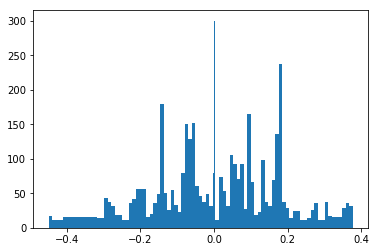

In [6]:
# Data Distribution after fixing boundary
op_class=np.unique(Y_augument)
plt.hist(Y_augument,op_class)

In [7]:
# Flipping Image for equal distribution
def Filpper(img_x,img_y,maximum):
    op_x=[]
    op_y=[]
    for ip_x,ip_y in zip(img_x,img_y):
        if(class_size[ip_y]<maximum):
            op_x.append(ip_x)
            op_y.append(ip_y)
            
            Fliped_x=cv2.flip(ip_x,1)
            Fliped_y=ip_y*-1.0
            op_x.append(Fliped_x)
            op_y.append(Fliped_y)
            keys=class_size.keys()
            if Fliped_y in keys:
                class_size[Fliped_y]=class_size[Fliped_y]+1
            else:
                class_size[Fliped_y]=1
        else:
            op_x.append(ip_x)
            op_y.append(ip_y)
    return np.array(op_x),np.array(op_y)
op_x,op_y=Filpper(X_augument,Y_augument,270)

(array([  17.,   12.,   15.,   12.,   20.,   36.,   28.,   15.,   14.,
          17.,   37.,   43.,   38.,   12.,   31.,   36.,   18.,   26.,
          14.,   11.,   11.,   36.,   41.,   25.,   56.,   14.,   28.,
          37.,   16.,  237.,   20.,  136.,   36.,   69.,   49.,   31.,
         179.,   37.,   51.,   98.,   26.,   23.,   55.,   19.,   33.,
          66.,   23.,  165.,   80.,   27.,  150.,   92.,  129.,   71.,
         152.,   92.,   61.,  106.,   46.,   32.,   38.,   53.,   49.,
          74.,   31.,   12.,   79.,  300.,   79.,   12.,   31.,   74.,
          49.,   53.,   38.,   32.,   46.,  106.,   61.,   92.,  152.,
          71.,  129.,   92.,  150.,   27.,   80.,  165.,   23.,   66.,
          33.,   19.,   55.,   23.,   26.,   98.,   51.,   37.,  179.,
          31.,   49.,   69.,   36.,  136.,   20.,  237.,   16.,   37.,
          28.,   14.,   56.,   25.,   41.,   36.,   11.,   11.,   14.,
          26.,   18.,   36.,   31.,   12.,   38.,   43.,   37.,   17.,
      

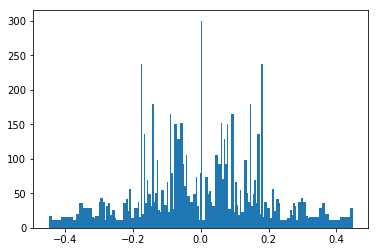

In [8]:
# Data distribution after flipping images
op_y_class=np.unique(op_y)
plt.hist(op_y,op_y_class)

In [9]:
# Change brightness
op_x,op_y=Filpper(op_x,op_y,150)

(array([  34.,   24.,   30.,   24.,   40.,   72.,   56.,   30.,   28.,
          34.,   74.,   86.,   76.,   24.,   62.,   72.,   36.,   52.,
          28.,   22.,   22.,   72.,   82.,   50.,  112.,   28.,   56.,
          74.,   32.,  237.,   40.,  272.,   72.,  138.,   98.,   62.,
         179.,   74.,  102.,  196.,   52.,   46.,  110.,   38.,   66.,
         132.,   46.,  165.,  149.,   54.,  150.,  184.,  149.,  142.,
         152.,  184.,  122.,  212.,   92.,   64.,   76.,  106.,   98.,
         148.,   62.,   24.,  149.,  300.,  158.,   24.,   62.,  148.,
          98.,  106.,   76.,   64.,   92.,  149.,  122.,  149.,  152.,
         142.,  258.,  149.,  150.,   54.,  160.,  165.,   46.,  132.,
          66.,   38.,  110.,   46.,   52.,  149.,  102.,   74.,  179.,
          62.,   98.,  138.,   72.,  149.,   40.,  237.,   32.,   74.,
          56.,   28.,  112.,   50.,   82.,   72.,   22.,   22.,   28.,
          52.,   36.,   72.,   62.,   24.,   76.,   86.,   74.,   34.,
      

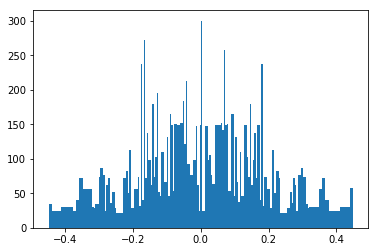

In [10]:
op_y_class=np.unique(op_y)
plt.hist(op_y,op_y_class)

(160, 320, 3)


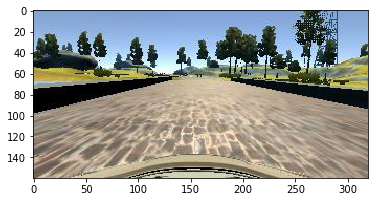

In [11]:
# Cropping images
img=plt.imread("data/IMG/center_2016_12_01_13_30_48_287.jpg")
plt.imshow(img)
print(img.shape)

(85, 320, 3)
Selected Upper limit : 55
Selected Lower limit : 20


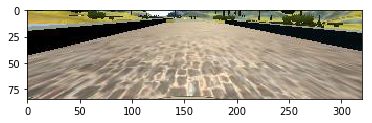

In [12]:
crop_img=img[55:140][:][:]
plt.imshow(crop_img)
print(crop_img.shape)
print("Selected Upper limit :",55)
print("Selected Lower limit :",20)

Change in Y Value


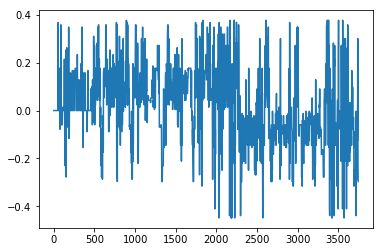

In [13]:
print("Change in Y Value")
plt.plot(Y_augument)

In [14]:
print("Input Shape : ",op_x.shape)
print("Output Shape : ",op_y.shape)

Input Shape :  (11874, 160, 320, 3)
Output Shape :  (11874,)


In [15]:
# Model 1
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation,Convolution2D,Lambda,Cropping2D

#Model Creation
Model_1 = Sequential()

# Image Augumentation
# 1. Cropping image
Model_1.add(Cropping2D(cropping=((55,20),(0,0)),input_shape=(160,320,3)))
# 2. Normalization of image
Model_1.add(Lambda(lambda x:(x/255.0)-0.5))

# Neural Network
# Layer 1
Model_1.add(Flatten())
Model_1.add(Dense(120))
# Layer 2
Model_1.add(Activation("relu"))
Model_1.add(Dense(1))

Model_1.compile(loss='mse',optimizer='Adam')

Using TensorFlow backend.


In [16]:
history=Model_1.fit(op_x,op_y,validation_split=0.2,shuffle=True,nb_epoch=5)
Model_1.save("model_1.h5")

Train on 9499 samples, validate on 2375 samples
Epoch 1/5
9499/9499 [==============================] - 19s - loss: 4.8248 - val_loss: 0.0356
Epoch 2/5
9499/9499 [==============================] - 17s - loss: 0.0158 - val_loss: 0.0290
Epoch 3/5
9499/9499 [==============================] - 17s - loss: 0.0092 - val_loss: 0.0290
Epoch 4/5
9499/9499 [==============================] - 17s - loss: 0.0069 - val_loss: 0.0293
Epoch 5/5
9499/9499 [==============================] - 17s - loss: 0.0054 - val_loss: 0.0299


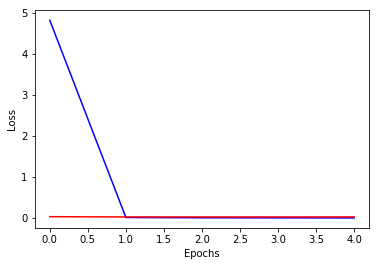

In [17]:
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("Graphs/model_1.png")

In [18]:
history=Model_1.fit(op_x,op_y,validation_split=0.2,shuffle=True,nb_epoch=15)
Model_1.save("model_1_V2.h5")

Train on 9499 samples, validate on 2375 samples
Epoch 1/15
9499/9499 [==============================] - 17s - loss: 0.0047 - val_loss: 0.0305
Epoch 2/15
9499/9499 [==============================] - 17s - loss: 0.0037 - val_loss: 0.0298
Epoch 3/15
9499/9499 [==============================] - 17s - loss: 0.0032 - val_loss: 0.0293
Epoch 4/15
9499/9499 [==============================] - 17s - loss: 0.0029 - val_loss: 0.0278
Epoch 5/15
9499/9499 [==============================] - 17s - loss: 0.0024 - val_loss: 0.0293
Epoch 6/15
9499/9499 [==============================] - 17s - loss: 0.0022 - val_loss: 0.0304
Epoch 7/15
9499/9499 [==============================] - 17s - loss: 0.0020 - val_loss: 0.0289
Epoch 8/15
9499/9499 [==============================] - 17s - loss: 0.0018 - val_loss: 0.0302
Epoch 9/15
9499/9499 [==============================] - 17s - loss: 0.0016 - val_loss: 0.0288
Epoch 10/15
9499/9499 [==============================] - 17s - loss: 0.0017 - val_loss: 0.0303
Epoch 11/15

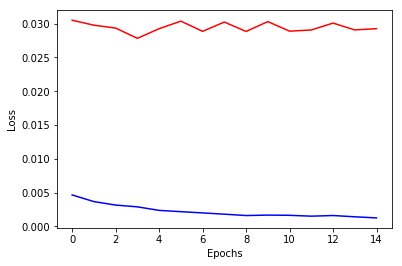

In [19]:
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("Graphs/model_1_V2.png")

In [21]:
# Model 2
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation,Convolution2D,Lambda,Cropping2D,MaxPooling2D

#Model Creation
Model_2 = Sequential()

# Image Augumentation
# 1. Cropping image
Model_2.add(Cropping2D(cropping=((55,20),(0,0)),input_shape=(160,320,3)))
# 2. Normalization of image
Model_2.add(Lambda(lambda x:(x/255.0)-0.5))

# Neural Networks

# Layer 1
Model_2.add(Convolution2D(6,3,3))
Model_2.add(MaxPooling2D(pool_size=(2,2)))
Model_2.add(Activation("elu"))
# Layer 2
Model_2.add(Flatten())
Model_2.add(Dense(120))
Model_2.add(Activation("relu"))
# Layer 3
Model_2.add(Dense(1))

Model_2.compile(loss='mse',optimizer='Adam')

In [22]:
history=Model_2.fit(op_x,op_y,validation_split=0.2,shuffle=True,nb_epoch=15)
Model_2.save("model_2.h5")

Train on 9499 samples, validate on 2375 samples
Epoch 1/15
9499/9499 [==============================] - 20s - loss: 0.0760 - val_loss: 0.0177
Epoch 2/15
9499/9499 [==============================] - 19s - loss: 0.0076 - val_loss: 0.0164
Epoch 3/15
9499/9499 [==============================] - 19s - loss: 0.0050 - val_loss: 0.0164
Epoch 4/15
9499/9499 [==============================] - 19s - loss: 0.0030 - val_loss: 0.0168
Epoch 5/15
9499/9499 [==============================] - 19s - loss: 0.0021 - val_loss: 0.0174
Epoch 6/15
9499/9499 [==============================] - 19s - loss: 0.0013 - val_loss: 0.0175
Epoch 7/15
9499/9499 [==============================] - 19s - loss: 9.7472e-04 - val_loss: 0.0173
Epoch 8/15
9499/9499 [==============================] - 19s - loss: 7.7758e-04 - val_loss: 0.0171
Epoch 9/15
9499/9499 [==============================] - 19s - loss: 7.3528e-04 - val_loss: 0.0173
Epoch 10/15
9499/9499 [==============================] - 19s - loss: 6.2553e-04 - val_loss: 0.

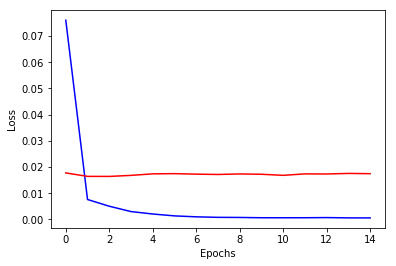

In [23]:
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("Graphs/model_2.png")

In [24]:
# Model 3
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation,Convolution2D,Lambda,Cropping2D,MaxPooling2D

#Model Creation
Model_3 = Sequential()

# Image Augumentation
# 1. Cropping image
Model_3.add(Cropping2D(cropping=((55,20),(0,0)),input_shape=(160,320,3)))
# 2. Normalization of image
Model_3.add(Lambda(lambda x:(x/255.0)-0.5))

# Neural Networks
# Layer 1
Model_3.add(Convolution2D(6,3,3))
Model_3.add(MaxPooling2D(pool_size=(2,2)))
Model_3.add(Activation("elu"))
# Layer 2
Model_3.add(Convolution2D(12,3,3))
Model_3.add(Activation("elu"))
# Layer 3
Model_3.add(Flatten())
Model_3.add(Dense(120))
Model_3.add(Activation("relu"))
# Layer 4
Model_3.add(Dense(1))

Model_3.compile(loss='mse',optimizer='Adam')

In [25]:
history=Model_3.fit(op_x,op_y,validation_split=0.2,shuffle=True,nb_epoch=15)
Model_3.save("model_3.h5")

Train on 9499 samples, validate on 2375 samples
Epoch 1/15
9499/9499 [==============================] - 26s - loss: 0.0398 - val_loss: 0.0158
Epoch 2/15
9499/9499 [==============================] - 25s - loss: 0.0054 - val_loss: 0.0162
Epoch 3/15
9499/9499 [==============================] - 25s - loss: 0.0029 - val_loss: 0.0165
Epoch 4/15
9499/9499 [==============================] - 25s - loss: 0.0015 - val_loss: 0.0166
Epoch 5/15
9499/9499 [==============================] - 25s - loss: 0.0011 - val_loss: 0.0165
Epoch 6/15
9499/9499 [==============================] - 25s - loss: 9.8941e-04 - val_loss: 0.0161
Epoch 7/15
9499/9499 [==============================] - 25s - loss: 6.3345e-04 - val_loss: 0.0165
Epoch 8/15
9499/9499 [==============================] - 25s - loss: 6.2365e-04 - val_loss: 0.0163
Epoch 9/15
9499/9499 [==============================] - 25s - loss: 6.5615e-04 - val_loss: 0.0163
Epoch 10/15
9499/9499 [==============================] - 25s - loss: 7.1443e-04 - val_loss

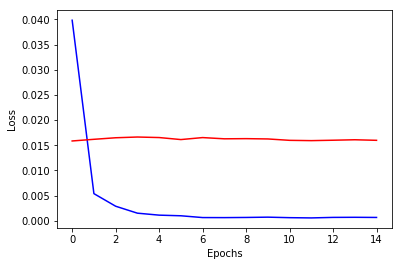

In [26]:
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("Graphs/model_2.png")